In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
sampleNo = 20;
# First group
mu0 = np.array([[-2, 2]])
Sigma0 = np.array([[2, 0], [0, 3]])
R0 = np.linalg.cholesky(Sigma0)
s0 = np.dot(np.random.randn(sampleNo, 2), R0) + mu0
# Second group
mu1 = np.array([[3, -2]])
Sigma1 = np.array([[1, 0], [0, 4]])
R1 = np.linalg.cholesky(Sigma1)
s1 = np.dot(np.random.randn(sampleNo, 2), R1) + mu1

In [96]:
from pandas import DataFrame
if s0.shape[1] == 2:
    s0 = np.insert(s0, 2, values=1, axis=1) # Add a column of tag values
if s1.shape[1] == 2:
    s1 = np.insert(s1, 2, values=0, axis=1) # Add a column of tag values
s = np.concatenate((s0,s1),axis=0) # concatenate the two groups
df = DataFrame(s, columns=['x1','x2','y'])
df

,x1,x2,y
0,-2.492123,4.000919,1.0
1,-0.654096,0.725367,1.0
2,-2.378575,3.044076,1.0
3,-0.750932,7.408867,1.0
4,-1.663445,2.994199,1.0
5,-1.180479,5.351793,1.0
6,-1.866351,2.666809,1.0
7,-1.172298,-0.989228,1.0
8,-3.234134,0.568017,1.0
9,-4.918342,3.573023,1.0


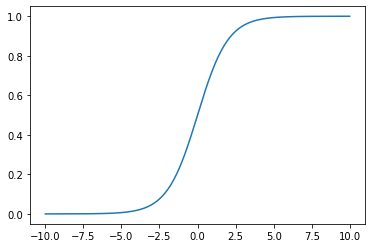

In [97]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
x = np.arange(-10,10,0.01) 
plt.plot(x,sigmoid(x)) 
plt.show()

In [98]:
w1 = -1
w2 = -5
b = 0
loss = 100000
epoch = 0
c = 0.001
while True:
    if(epoch%20==0):
        print("epoch:", epoch)
        print("w1:%.2f, w2:%.2f"%(w1,w2))
    lastloss = loss
    loss = 0
    partialw1 = 0
    partialw2 = 0
    for k in range(2*sampleNo):
        yhat = sigmoid(w1*s[k,0]+w2*s[k,1]+b)
        y = s[k,2]
        loss += (yhat-y)*(yhat-y)
        partialw1 += 2*(yhat-y)*yhat*(1-yhat)*s[k,0]
        partialw2 += 2*(yhat-y)*yhat*(1-yhat)*s[k,1]
    if(epoch%100==0):
        print("loss:", loss)
    if(lastloss<loss):
        break
    w1 = w1 - 0.1 * partialw1
    w2 = w2 - 0.1 * partialw2
    epoch = epoch+1
    if(epoch>1000):
        break
    if(loss<0.1):
        break
    if(lastloss - loss < c):
        break
print("epoch:", epoch)
print("w1:%.2f, w2:%.2f"%(w1,w2))
print("loss:", loss)

epoch: 0
w1:-1.00, w2:-5.00
loss: 29.119843708195013
epoch: 20
w1:-4.92, w2:-0.81
epoch: 40
w1:-4.89, w2:-0.01
epoch: 60
w1:-4.73, w2:0.24
epoch: 80
w1:-4.46, w2:0.67
epoch: 100
w1:-3.68, w2:1.86
loss: 1.5523994696455743
epoch: 120
w1:-3.14, w2:2.79
epoch: 124
w1:-3.16, w2:2.83
loss: 0.6550122193740869


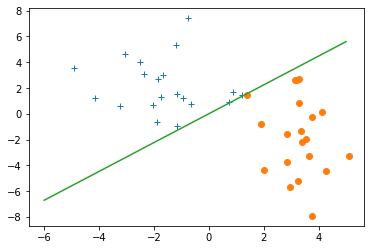

In [99]:
x1 = np.arange(-6,6)
x2 = (-w1 * x1 - b)/w2

plt.plot(s0[:,0],s0[:,1],'+')
plt.plot(s1[:,0],s1[:,1],'o')
plt.plot(x1,x2)

plt.show()